In [1]:
import fastai
from fastai import *
from fastai.vision import *

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
data = ImageDataBunch.from_folder('fastai_data',
                                  ds_tfms=get_transforms(),
                                  size=128,
                                  num_workers=0,
                                  test= 'test')
data

ImageDataBunch;

Train: LabelList (5056 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,0,0,0
Path: fastai_data;

Valid: LabelList (2520 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,0,0,0
Path: fastai_data;

Test: LabelList (19278 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: fastai_data

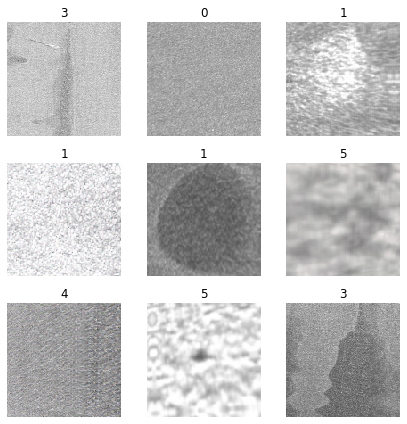

In [3]:
data.show_batch(rows=3, figsize=(6,6))

In [4]:
learn = create_cnn(data, models.resnet152, metrics=accuracy)
learn.fit_one_cycle(10)

C:\Users\foresight\Anaconda3\lib\site-packages\fastai\vision\learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to C:\Users\foresight/.cache\torch\hub\checkpoints\resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.464390,0.201189,0.932143,00:35
1,0.266619,0.106226,0.961905,00:33
2,0.177406,0.044132,0.984921,00:33
3,0.122254,0.032621,0.988492,00:33
4,0.098402,0.025425,0.991667,00:33
5,0.073677,0.016164,0.994444,00:33
6,0.066520,0.012291,0.996429,00:33
7,0.056184,0.010834,0.996825,00:34
8,0.046653,0.010130,0.996825,00:33
9,0.032564,0.009759,0.996825,00:33


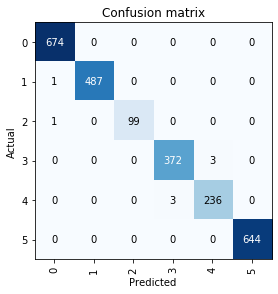

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

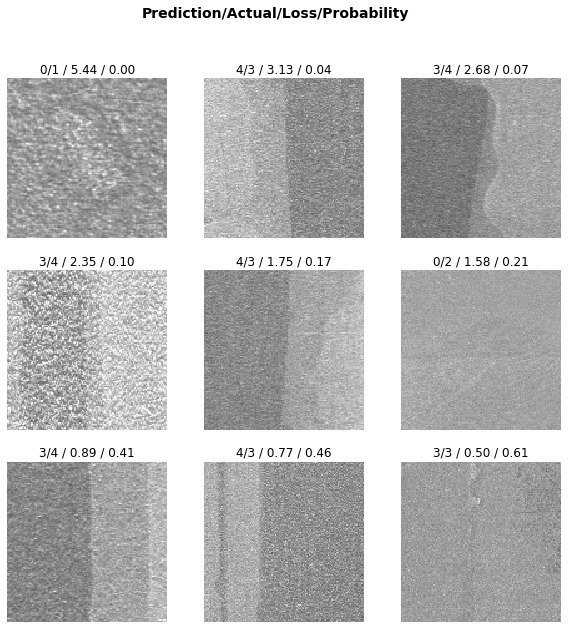

In [6]:
interp.plot_top_losses(9, figsize=(10,10))

In [16]:
preds, __= learn.get_preds(ds_type= DatasetType.Test)
#preds, __= learn.TTA(ds_type= DatasetType.Test)

In [17]:
preds.numpy().shape

(19278, 6)

In [18]:
ans= preds.numpy().argmax(1)

In [19]:
#test_name= os.listdir('test_images')

submit= pd.read_csv('upload_sample.csv')
submit['Label']= ans
    
submit.to_csv('submit.csv', index= False)